# Business Goal:
You are required to model the demand for shared bikes with the available independent variables.
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing the libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
##importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import r2_score

In [6]:
## import statsmodel
import statsmodels.api as sm


In [7]:
## import below for vif calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading and understanding the data

In [8]:
## Reading the data set
bikeshare = pd.read_csv('day.csv')

In [9]:
bikeshare.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [10]:
##Checking the shape of the dataset to find the rows ad columns of dataset
bikeshare.shape

(730, 16)

In [10]:
## here 730 rows and 16 columns

In [11]:

bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
bikeshare.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [13]:
##Check for  the null value
bikeshare.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
bikeshare.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
## so no null values in the data set


In [15]:
bikeshare

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

# EDA

# After understanding the columns :
1. 'instant' is only the row number
2. 'dteday' is the date, we will get the information from 'mnth' and 'yr' column
3. 'cnt' is the sum of 'casual' and 'registered' column.
so we can drop 'instant' , 'dteday' ,  'casual' ,'registered' columns from the dataset
Also from the dataset characteristics(given) ,data type of  'season','mnth' ,'weekday' and 'weathersit' columns shoul be to category from integer. 

In [9]:
## dropping columns
bikeshare.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)

In [17]:
bikeshare.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [18]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [19]:
bikeshare['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
## changing datatype
bikeshare['season']= bikeshare['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [21]:
bikeshare['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [22]:
bikeshare['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [11]:
bikeshare['mnth'] = bikeshare['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [24]:
bikeshare['mnth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: mnth
Non-Null Count  Dtype 
--------------  ----- 
730 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [25]:
bikeshare['weekday'].value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [12]:
bikeshare['weekday'] = bikeshare['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [27]:
bikeshare['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
bikeshare['weathersit'] = bikeshare['weathersit'].map({1:'clear',2:'mist',3:'LightSnowRain',4:'HeavyRainMist'})

In [29]:
bikeshare['weathersit'].value_counts()

clear            463
mist             246
LightSnowRain     21
Name: weathersit, dtype: int64

In [30]:
bikeshare.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1       mist  14.110847   
1  spring   0  jan        0     tue           1       mist  14.902598   
2  spring   0  jan        0     wed           1      clear   8.050924   
3  spring   0  jan        0     thu           1      clear   8.200000   
4  spring   0  jan        0     fri           1      clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

# Visualising the data

In [31]:
##pairplot for numerical columns
numcol = ['temp','atemp','hum','windspeed','cnt']

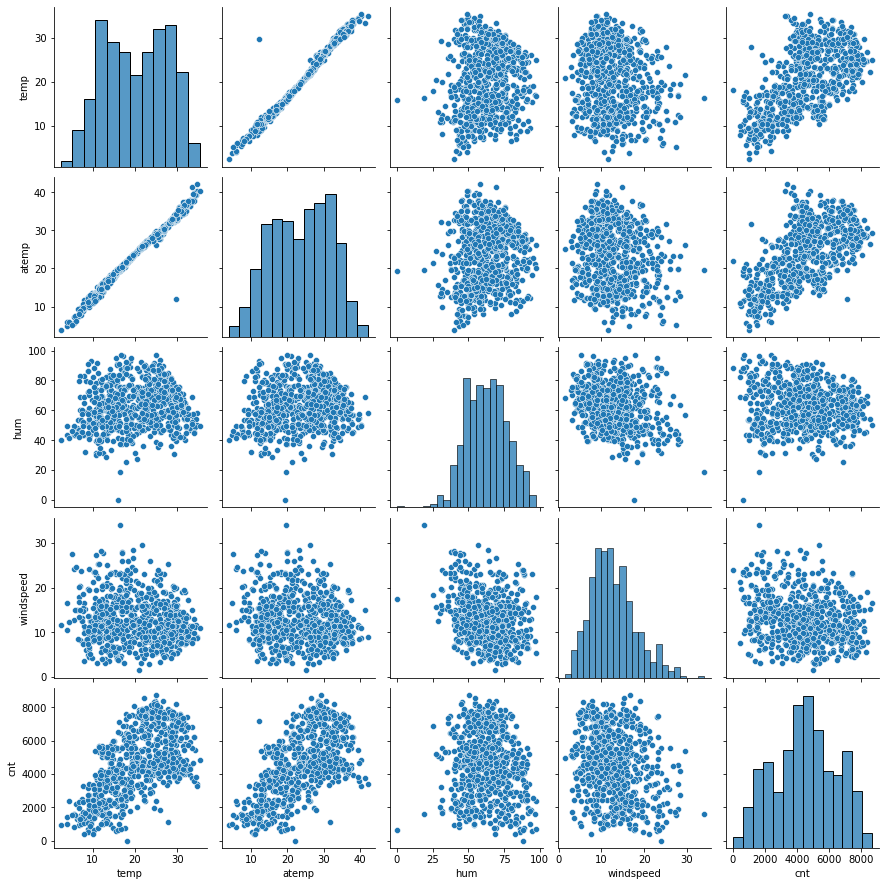

In [32]:
sns.pairplot(data = bikeshare,vars =['temp','atemp','hum','windspeed','cnt'] )
plt.show()

In [ ]:
## from the above we can see linear relationship between cnt vs temp and cnt vs atemp

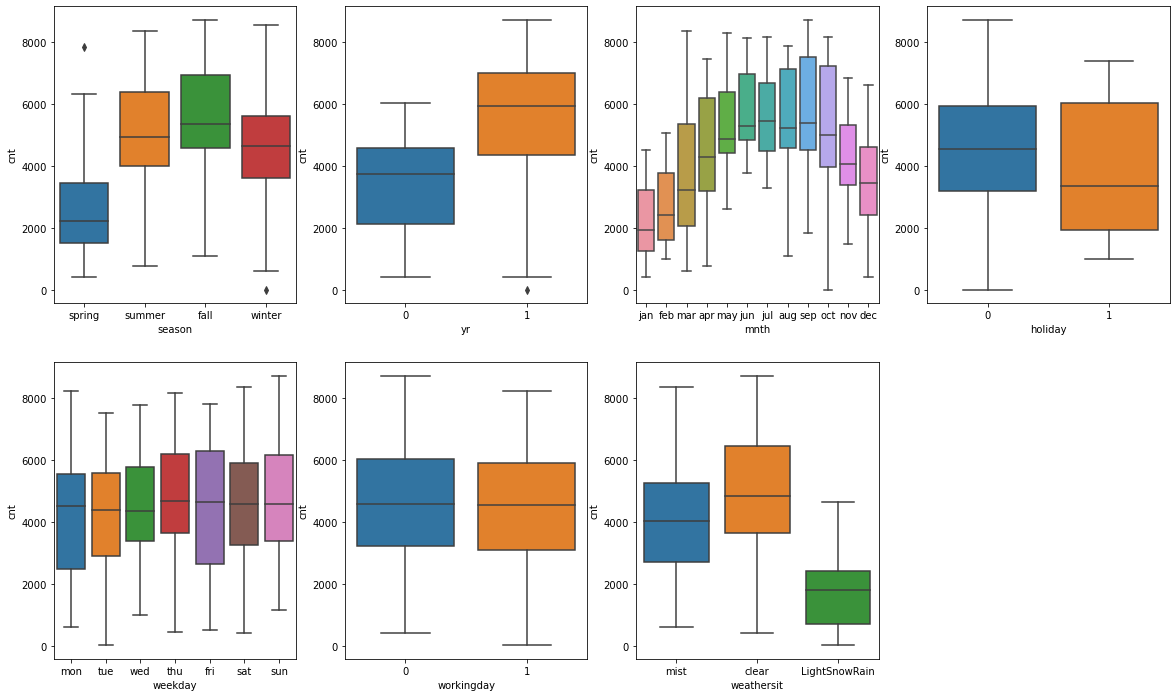

In [33]:
##boxplot for categorical column VS target column(cnt)
plt.figure(figsize = (20,12))
plt.subplot(2,4,1)
sns.boxplot(x= 'season',y='cnt',data = bikeshare)
plt.subplot(2,4,2)
sns.boxplot(x= 'yr',y='cnt',data = bikeshare)
plt.subplot(2,4,3)
sns.boxplot(x= 'mnth',y='cnt',data = bikeshare)
plt.subplot(2,4,4)
sns.boxplot(x= 'holiday',y='cnt',data = bikeshare)
plt.subplot(2,4,5)
sns.boxplot(x= 'weekday',y='cnt',data = bikeshare)
plt.subplot(2,4,6)
sns.boxplot(x= 'workingday',y='cnt',data = bikeshare)
plt.subplot(2,4,7)
sns.boxplot(x= 'weathersit',y='cnt',data = bikeshare)
plt.show()

In [40]:
## from the above, we can tell that cnt is more in fall season
## cnt is more in year 2019 compared to 2018
##cnt is increasing from jan to sep after that decreasing.Observed decrease in july also
##cnt is more on clear weathersit, after that mist is coming
## deamnd decreases in holiday
## cnt is more in fall ,then summer after that winter 

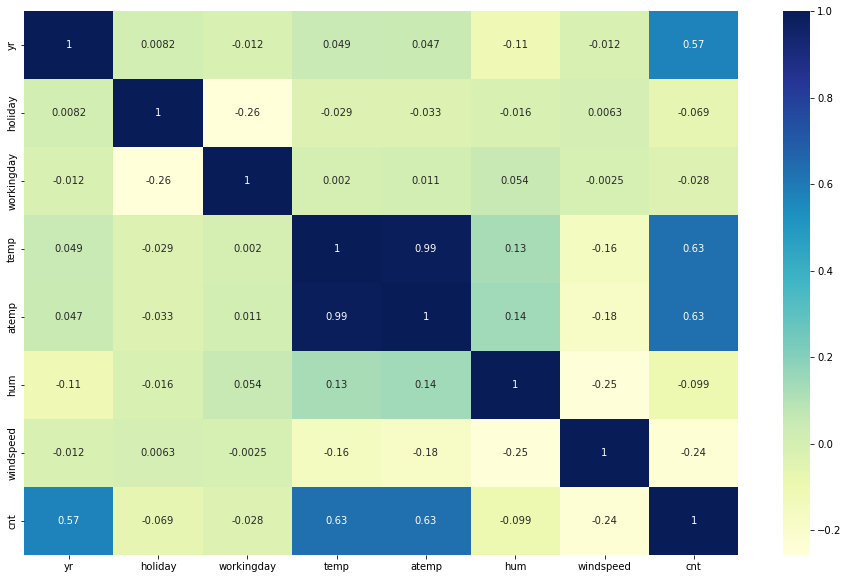

In [34]:
## Check Correlation between the variables
plt.figure(figsize = (16, 10))
sns.heatmap(bikeshare.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Here we can see high correlation between 'temp' and 'atemp' , so we can remove any one of them. so removing 'atemp'

In [14]:
bikeshare.drop(['atemp'],axis = 1,inplace = True)

In [36]:
bikeshare.shape

(730, 11)

# Data Preparation

In [42]:
## Create dummy variables for cateorical variables ,season,mnth,weekday and weathersit


In [15]:
season_d = pd.get_dummies(bikeshare['season'],drop_first = True)

In [19]:
season_d 

spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]

In [16]:
mnth_d = pd.get_dummies(bikeshare['mnth'],drop_first = True)

In [17]:
weekday_d = pd.get_dummies(bikeshare['weekday'],drop_first = True)

In [18]:
weathersit_d = pd.get_dummies(bikeshare['weathersit'],drop_first = True)

In [313]:
weathersit_d

clear  mist
0        0     1
1        0     1
2        1     0
3        1     0
4        1     0
..     ...   ...
725      0     1
726      0     1
727      0     1
728      1     0
729      0     1

[730 rows x 2 columns]

In [19]:
##combine the dummy variable dataset to original dataset, bikeshare and create a new data set
bikeshare_new = pd.concat([bikeshare,season_d,mnth_d,weekday_d,weathersit_d],axis = 1)



In [42]:
bikeshare_new.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1       mist  14.110847   
1  spring   0  jan        0     tue           1       mist  14.902598   
2  spring   0  jan        0     wed           1      clear   8.050924   
3  spring   0  jan        0     thu           1      clear   8.200000   
4  spring   0  jan        0     fri           1      clear   9.305237   

       hum  windspeed  ...  oct  sep  mon  sat  sun  thu  tue  wed  clear  \
0  80.5833  10.749882  ...    0    0    1    0    0    0    0    0      0   
1  69.6087  16.652113  ...    0    0    0    0    0    0    1    0      0   
2  43.7273  16.636703  ...    0    0    0    0    0    0    0    1      1   
3  59.0435  10.739832  ...    0    0    0    0    0    1    0    0      1   
4  43.6957  12.522300  ...    0    0    0    0    0    0    0    0      1   

   mist  
0     1  
1     1  
2     0  
3     0  
4     0  

[5 rows x 33 columns]

In [20]:
##drop season,mnth,weekday and weathersit because we created dummy variable for these columns
bikeshare_new.drop(['season','mnth','weekday','weathersit'], axis =1, inplace = True)

In [44]:
bikeshare_new.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           1  14.110847  80.5833  10.749882   985       1   
1   0        0           1  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  oct  sep  mon  sat  sun  thu  tue  wed  clear  mist  
0       0       0  ...    0    0    1    0    0    0    0    0      0     1  
1       0       0  ...    0    0    0    0    0    0    1    0      0     1  
2       0       0  ...    0    0    0    0    0    0    0    1      1     0  
3       0       0  ...    0    0    0    0    0    1    0    0      1     0  
4       0       0  ...    0    0    0    0    0    0    0    0      1     0  

[5 rows x 29 columns]

In [97]:
bikeshare_new.shape

(730, 29)

In [45]:
bikeshare_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  aug         730 non-null    uint8  
 11  dec         730 non-null    uint8  
 12  feb         730 non-null    uint8  
 13  jan         730 non-null    uint8  
 14  jul         730 non-null    uint8  
 15  jun         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  may         730 non-null    uint8  
 18  nov         730 non-null    uint8  
 19  oct         730 non-null    u

## Splitting the data into training and testing set

In [21]:
np.random.seed(0)
df_train,df_test = train_test_split(bikeshare_new,train_size = 0.7,random_state = 100)

## Rescaling the features (numeric variables column) using minmaxscaler

In [22]:
scaler = MinMaxScaler()

In [23]:
num_cols = ['temp','hum','windspeed','cnt']

In [24]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [25]:
## Checking the shape of train set
df_train.shape

(510, 29)

In [26]:
## Checking the shape of test set
df_test.shape

(220, 29)

In [52]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.453386    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  ...         oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.243137    0.247059    0.247059  ...    0.084314   
std      0.224421    0.429398    0.431725    0.431725  ...    0.278131   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sep         mon         sat         sun         thu         tue  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.154902    0.129412    0.137255    0.143137    0.152941   
std      0.272166    0.362166    0.335985    0.344454    0.350557    0.360284   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              wed       clear        mist  
count  510.000000  510.000000  510.000000  
mean     0.135294    0.625490    0.345098  
std      0.342373    0.484471    0.475867  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    1.000000    0.000000  
75%      0.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [53]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
576   1        0           1  0.815169  0.725633   0.264686  0.827658       0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255       1   
728   1        0           1  0.245101  0.498067   0.663106  0.204096       1   
482   1        0           0  0.395666  0.504508   0.188475  0.482973       0   
111   0        0           0  0.345824  0.751824   0.380981  0.191095       0   

     summer  winter  ...  oct  sep  mon  sat  sun  thu  tue  wed  clear  mist  
576       0       0  ...    0    0    0    0    0    0    0    1      1     0  
426       0       0  ...    0    0    0    0    1    0    0    0      0     1  
728       0       0  ...    0    0    1    0    0    0    0    0      1     0  
482       1       0  ...    0    0    0    0    1    0    0    0      0     1  
111       1       0  ...    0    0    0    0    1    0    0    0      0     1  

[5 rows x 29 columns]

# Dividing into X and Y sets for the model building

In [27]:
X_train = df_train
y_train = df_train.pop('cnt')

# With all the variables building the model

In [28]:
##Adding constant variable
X_train_lm = sm.add_constant(X_train)

#Build a linear model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.141216
yr            0.231135
holiday      -0.134754
workingday   -0.060049
temp          0.440512
hum          -0.157355
windspeed    -0.182486
spring       -0.040386
summer        0.046443
winter        0.112621
aug           0.027307
dec          -0.044387
feb          -0.037422
jan          -0.064209
jul          -0.028504
jun           0.008393
mar           0.000800
may           0.024732
nov          -0.039553
oct           0.005634
sep           0.090823
mon          -0.024621
sat          -0.055719
sun          -0.049460
thu           0.004227
tue          -0.026072
wed          -0.010225
clear         0.249947
mist          0.192099
dtype: float64

In [29]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.34e-178
Time:                        22:20:28   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1412      0.090      1.564      0.1

In [ ]:
# Here we can see that p value of many variables are high.
## we are having 29 varibles, so manually adding and dropping the feature is not a good idea. 
##because it will be very time consuming process.
## so we can use Recursive Feature Elimination(RFE) for the selection of feature.And then build the model using selected features


# Selecting the features using Recursive Feature Elimination

In [30]:
lm = LinearRegression()


rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 6),
 ('wed', False, 10),
 ('clear', True, 1),
 ('mist', True, 1)]

In [32]:
##RFE supporting variables
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'clear', 'mist'],
      dtype='object')

In [44]:
##RFE not supporting variables
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

# Building model using stats model

# Model 1

In [33]:
##creating X_train dataset with RFE selected variables
X_train_rfe = X_train[rfe_col]

In [34]:
##Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
##creating linear model
lm1 = sm.OLS(y_train, X_train_rfe).fit()

In [36]:
lm1.params

const        0.073186
yr           0.230404
holiday     -0.091089
temp         0.481503
hum         -0.162213
windspeed   -0.188726
spring      -0.061255
summer       0.042337
winter       0.101921
dec         -0.035461
jan         -0.043411
jul         -0.055250
nov         -0.038701
sep          0.075467
clear        0.246481
mist         0.192181
dtype: float64

In [37]:
##Summary of the linear model1
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        22:21:02   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0732      0.048      1.540      0.1

In [38]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0       const  143.15
14      clear   10.36
15       mist    8.95
6      spring    5.27
3        temp    4.42
8      winter    3.83
7      summer    2.77
4         hum    1.92
12        nov    1.77
10        jan    1.68
9         dec    1.50
11        jul    1.49
13        sep    1.34
5   windspeed    1.21
1          yr    1.04
2     holiday    1.03

In [43]:
## For the above model(model1) all the p values are less than 0.05
## so we will check the vif , here for 'clear' and 'mist' (weathersit) value is high.
## we can drop any one of them,droping mist because from the business understanding 'clear' weather will have more impact on target variable cnt
## dropping mist and creating model 2

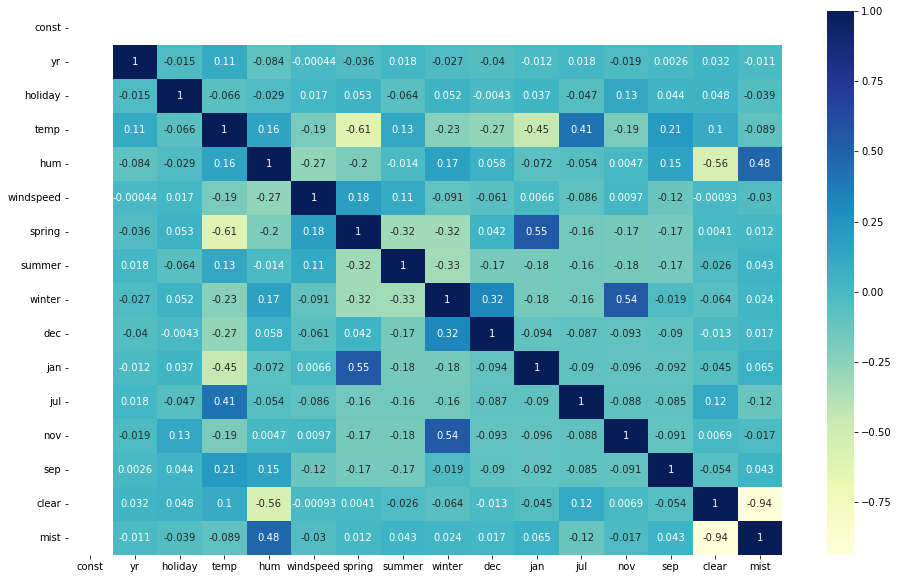

In [66]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
## For the above model(model1) all the p values are less than 0.05
## so we will check the vif , here for 'clear' and 'mist' (weathersit) value is high.
## we can drop any one of them,droping mist because from the business understanding 'clear' weather will have more impact on target variable cnt
## mist and hum is correlated also
## dropping mist and creating model 2

# Model 2

In [39]:
X_train_new2 = X_train_rfe.drop(['mist'], axis = 1)

In [40]:
#Adding constant variable
X_train_new2 = sm.add_constant(X_train_new2)
##creating linear model
lm2 = sm.OLS(y_train, X_train_new2).fit()

In [41]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          7.03e-178
Time:                        22:21:20   Log-Likelihood:                 485.38
No. Observations:                 510   AIC:                            -940.8
Df Residuals:                     495   BIC:                            -877.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2798      0.041      6.754      0.0

In [70]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  97.35
6      spring   5.26
3        temp   4.39
8      winter   3.83
7      summer   2.76
4         hum   1.86
12        nov   1.76
10        jan   1.67
14      clear   1.61
9         dec   1.49
11        jul   1.49
13        sep   1.34
5   windspeed   1.19
1          yr   1.04
2     holiday   1.03

In [48]:
## In model 2, p value of 'dec' is more, so dropping that variable and creating model 3

# Model 3

In [42]:
X_train_new3 = X_train_new2.drop(['dec'], axis = 1)

In [43]:
#Adding constant variable
X_train_new3 = sm.add_constant(X_train_new3)
##creating linear model
lm3 = sm.OLS(y_train, X_train_new3).fit()

In [44]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.13e-178
Time:                        22:21:42   Log-Likelihood:                 484.56
No. Observations:                 510   AIC:                            -941.1
Df Residuals:                     496   BIC:                            -881.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2697      0.041      6.632      0.0

In [74]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  93.72
6      spring   5.19
3        temp   3.95
8      winter   3.76
7      summer   2.68
4         hum   1.85
13      clear   1.60
9         jan   1.56
10        jul   1.49
11        nov   1.49
12        sep   1.31
5   windspeed   1.18
1          yr   1.04
2     holiday   1.03

In [45]:
## In model 3, p value of 'nov' is more . so dropping 'nov' variale and creating model 4

# Model 4

In [46]:
X_train_new4= X_train_new3.drop(['nov'], axis = 1)


In [47]:
#Adding constant variable
X_train_new4 = sm.add_constant(X_train_new4)
##creating linear model
lm4 = sm.OLS(y_train, X_train_new4).fit()

In [48]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.42e-179
Time:                        22:21:57   Log-Likelihood:                 483.95
No. Observations:                 510   AIC:                            -941.9
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2640      0.040      6.545      0.0

In [78]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  92.18
6      spring   5.08
3        temp   3.87
8      winter   3.59
7      summer   2.64
4         hum   1.84
12      clear   1.60
9         jan   1.56
10        jul   1.48
11        sep   1.30
5   windspeed   1.18
1          yr   1.03
2     holiday   1.02

In [59]:
## in model 4, p value of 'jan' is more, so dropping 'jan' variable and creating mode1 5

# Model 5

In [49]:
X_train_new5 = X_train_new4.drop(['jan'], axis = 1)


In [50]:
#Adding constant variable
X_train_new5 = sm.add_constant(X_train_new5)
##creating linear model
lm5 = sm.OLS(y_train, X_train_new5).fit()

In [51]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.68e-180
Time:                        22:22:11   Log-Likelihood:                 482.88
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     498   BIC:                            -890.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2544      0.040      6.387      0.0

In [82]:
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  89.65
6      spring   5.01
3        temp   3.61
8      winter   3.48
7      summer   2.62
4         hum   1.84
11      clear   1.60
9         jul   1.48
10        sep   1.30
5   windspeed   1.17
1          yr   1.03
2     holiday   1.02

In [ ]:
## in model 5 p value of all variables are ok

In [ ]:
## vif of spring is 5.01

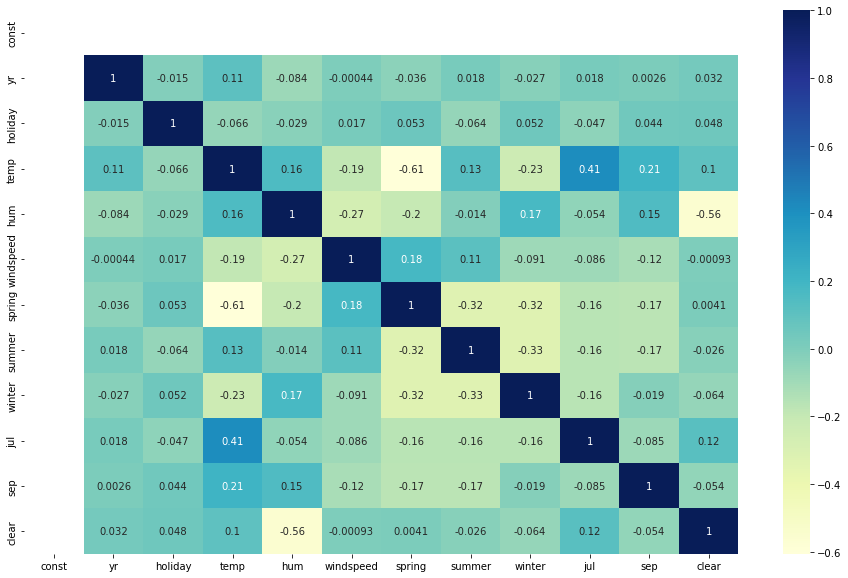

In [52]:
## checking the the correlation matrix to find out correlation between predictor variable
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new5.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:

## vif of spring is 5.01, and also spring is having correlation with summer and winter
##so dropping 'spring' and creating model 6

# Model 6

In [53]:
X_train_new6 = X_train_new5.drop(['spring'], axis = 1)


In [54]:
#Adding constant variable
X_train_new6 = sm.add_constant(X_train_new6)
##creating linear model
lm6 = sm.OLS(y_train, X_train_new6).fit()

In [55]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.34e-180
Time:                        22:22:44   Log-Likelihood:                 480.20
No. Observations:                 510   AIC:                            -938.4
Df Residuals:                     499   BIC:                            -891.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2039      0.033      6.115      0.0

In [87]:
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  62.32
4         hum   1.82
3        temp   1.60
10      clear   1.59
8         jul   1.43
6      summer   1.33
7      winter   1.28
9         sep   1.19
5   windspeed   1.15
1          yr   1.03
2     holiday   1.01

In [ ]:
##for model 6,p value are less than 0.05 and vif also getting less than 5


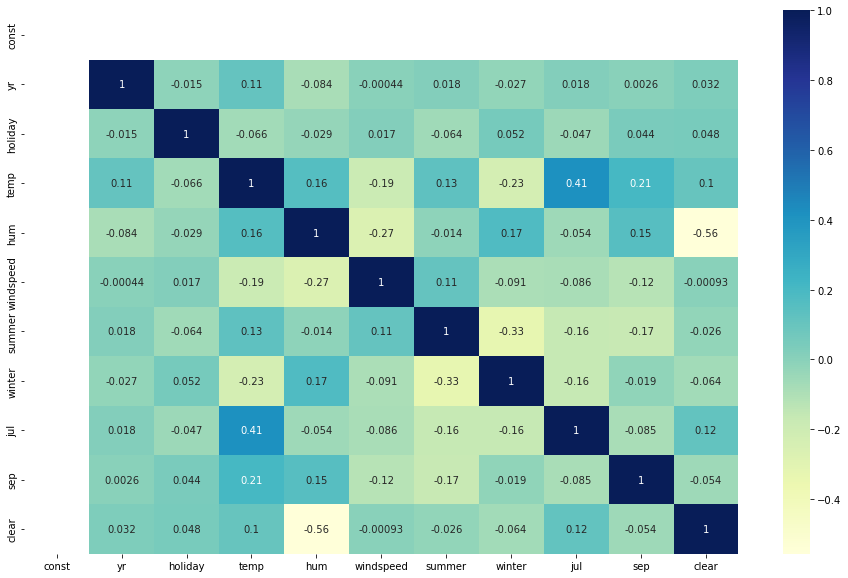

In [88]:
## checking the the correlation matrix to find out correlation between predictor variables
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new6.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
## here correlation between jul and temp is  0.41. so removing jul and building Model 7

# Model 7

In [56]:
X_train_new7 = X_train_new6.drop(['jul'], axis = 1)

In [57]:
#Adding constant variable
X_train_new7 = sm.add_constant(X_train_new7)
##creating linear model
lm7 = sm.OLS(y_train, X_train_new7).fit()

In [58]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     252.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.30e-180
Time:                        22:23:00   Log-Likelihood:                 476.03
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     500   BIC:                            -889.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2043      0.034      6.081      0.0

In [92]:
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0      const  62.32
4        hum   1.81
9      clear   1.59
3       temp   1.27
7     winter   1.25
6     summer   1.19
5  windspeed   1.15
8        sep   1.11
1         yr   1.03
2    holiday   1.01

In [ ]:
##for model 7,p value are less than 0.05 and vif also getting less than 5


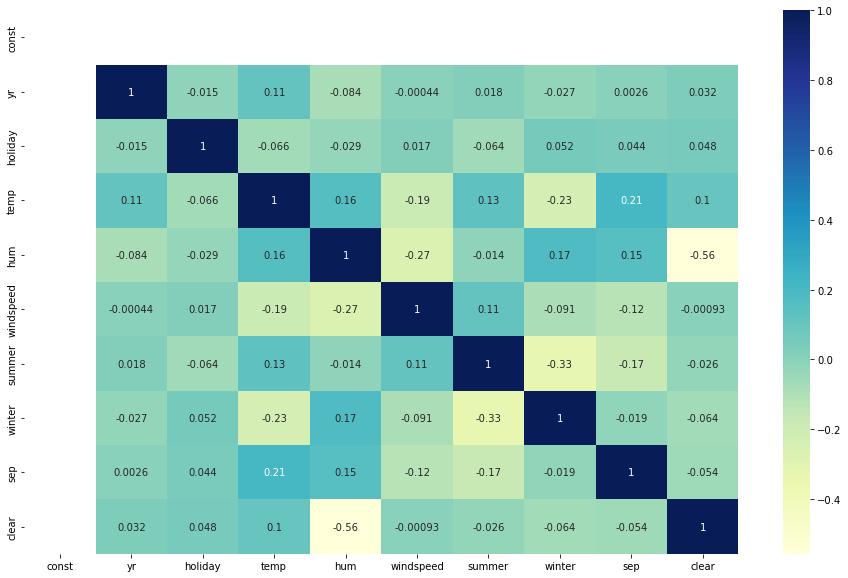

In [93]:
## checking the the correlation matrix to find out correlation between predictor variable
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new7.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
## humidity and clear(weather) having correlation
## dropping hum variable and building model 8

# Model 8

In [59]:
X_train_new8 = X_train_new7.drop(['hum'], axis = 1)

In [60]:
#Adding constant variable
X_train_new8 = sm.add_constant(X_train_new8)
##creating linear model
lm8 = sm.OLS(y_train, X_train_new8).fit()

In [61]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.45e-174
Time:                        22:23:11   Log-Likelihood:                 460.26
No. Observations:                 510   AIC:                            -902.5
Df Residuals:                     501   BIC:                            -864.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0417      0.018      2.337      0.0

In [97]:
vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0      const  16.56
3       temp   1.20
5     summer   1.19
6     winter   1.19
7        sep   1.11
4  windspeed   1.07
8      clear   1.03
1         yr   1.01
2    holiday   1.01

In [ ]:
## In model 8,p value of all vaiables are near to 0. and vif also getting less than 5


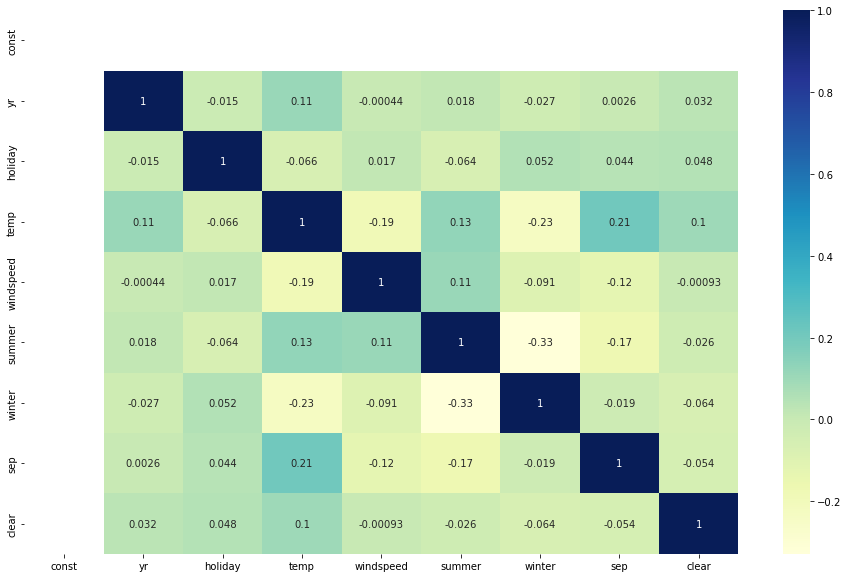

In [98]:
## checking the the correlation matrix to find out correlation between predictor variable
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new8.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
## no much correlation between variables also
## so taking model 8 as final model

# Taking Model 8 as final model and doing Residual analysis and Predictions

# Residual analysis of train data

In [62]:
y_train_pred = lm8.predict(X_train_new8)

In [ ]:
# 1. Plot the histogram of the error terms to check whether error terms are normally distributed or not

Text(0.5, 0, 'Errors')

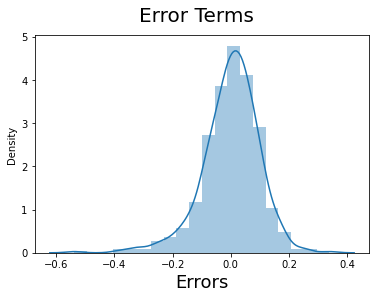

In [63]:

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [ ]:
## from the histogram we can tell that error terms are normally distributed

In [101]:
## 2.Check Correlation between the variables

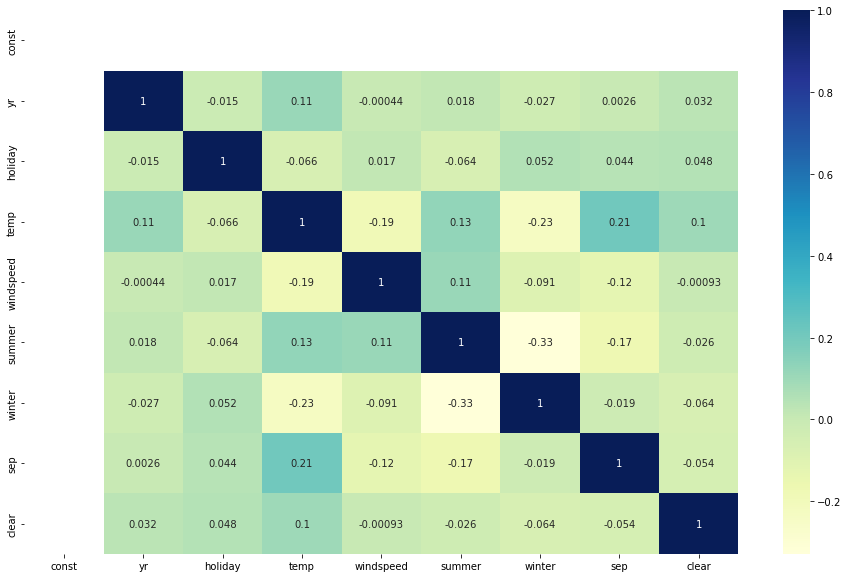

In [102]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new8.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [101]:
## from the heat map we can tell that there is no correlation between independent variables

In [ ]:
## 3. The vif of variables in final model (model 8) is less than 5. From this we can tell that multicolinearity is not present

In [ ]:
## 4.CheckError terms are independent

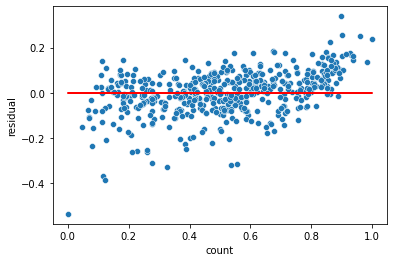

In [64]:
re = y_train - y_train_pred
sns.scatterplot(y_train,re)
plt.plot(y_train,(y_train - y_train),'-r')
plt.xlabel("count")
plt.ylabel("residual")
plt.show()

In [ ]:
##From the above we can tell that error terms are independent of each other

# Making Predictions

In [65]:
num_cols = ['temp','hum','windspeed','cnt']

In [66]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [67]:
df_test[num_cols]


temp       hum  windspeed       cnt
184  0.831783  0.657364   0.084219  0.692706
535  0.901354  0.610133   0.153728  0.712034
299  0.511964  0.837699   0.334206  0.303382
221  0.881625  0.437098   0.339570  0.547400
152  0.817246  0.314298   0.537414  0.569029
..        ...       ...        ...       ...
702  0.519232  0.756118   0.283397  0.757478
127  0.584649  0.650923   0.069510  0.495973
640  0.745598  0.817947   0.052115  0.868615
72   0.331557  0.512107   0.203418  0.232858
653  0.509887  0.575354   0.300794  0.864243

[220 rows x 4 columns]

In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
X_train_new8 = X_train_new8.drop(['const'], axis=1)

In [70]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe
X_test_new = X_test[X_train_new8.columns]



In [71]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [72]:
# Making predictions
y_pred = lm8.predict(X_test_new)

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2 = r2_score(y_test,y_pred)
round(r2,4)

0.7832

## r2 for test data is 0.7832

In [100]:
## adjusted r2 for test data = 1-[(1-r2)(N-1)/N-p-1]
## ie,0.775

# Model evaluation

Text(0, 0.5, 'y_pred')

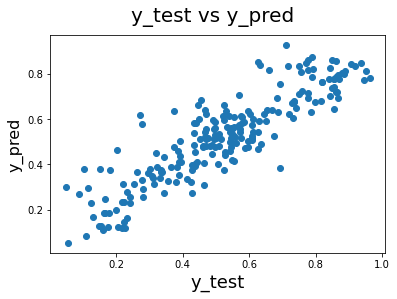

In [75]:

# Plotting y_test and y_pred to understand the distribution
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

# Comparing train an test data

## r2 of train data : 0.808
## adjusted r2 of train data: 0.805

## r2 of test data : 0.7832
## adjusted r2 of test data: 0.775
## The difference between r2 of train data and test data is with in the limit. 
## so our model is a best fit model.

## Conclusion:

## The significant variables which predict the demand of bike share are:
## yr(year),temp, clear(weathersit), winter(season), summer(season), sep(month),windspeed and holiday


## y = m1x1+m2x2+..+c

In [ ]:
## cnt = 0.0417 + (0.2366*yr) + (0.5428*temp) + (-0.0928*holiday) + (-0.1756*windspeed) + (0.0903*summer) + (0.1205*winter) + (0.0978*sep) + (0.0939*clear)

## Here cnt is our target variable. yr, temp , summer , winter, sep and clear variables are positively correlated to target, that is increase in these features increases the demand of bike sharing.

## wind speed and holiday is negatively correlated with target variable, that is increase in these features decreses the demand of bike sharing.


In [ ]:
## that is : one unit increase in temp increases the cnt by 0.5428 units(+ve correlation)
## and one unit increase in windspeed decreases the cnt by 0.1756 units(-ve correlation) .

## Expectations:
## The year goes , demand also increases (because cnt is more in 2019 compared to 2028), so after the pandamic situation the business may increase.